<a href="https://colab.research.google.com/github/suisanki/SML_team9/blob/main/Visualization_of_online_and_our_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CONCLUSION**<br>
For online data, real and fake data seems to be separable, but boundary doesn't seems quite linear. Good supporting reason to use randomforest and XGBoosts.<br>
For our own dataset, luckly enough, raw-colored data is almost linearly separable and we should use this dataset for our final test. It seems that we don't need to use black and white image as colored image is already separable. <br>Surprisingly, this separability seems to be lost when picture is cropped, thus cropped image should not be used in our analysis.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io

In [ ]:
file_path = 'https://raw.githubusercontent.com/suisanki/SML_team9/main/data_banknote_authentication.csv'

df = pd.read_csv(file_path)

In [ ]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
df['class'] = df['class'].replace({0: 'Real', 1: 'Fake'})

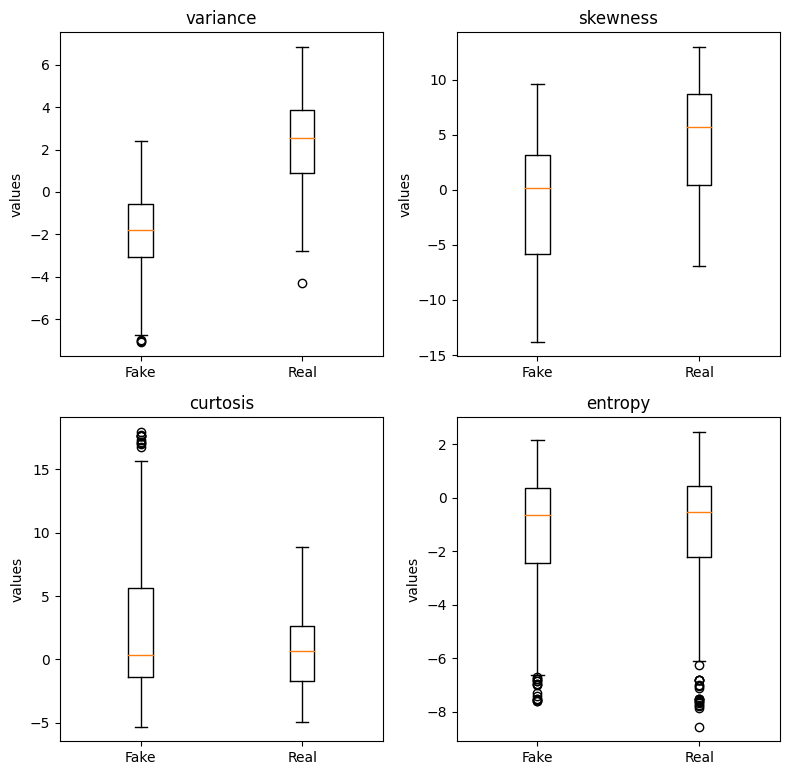

In [ ]:
plt.figure(figsize=(8,8))
for i in range(4):
  grouped_data = [df.iloc[:,i][df['class'] == group] for group in np.unique(df['class'])]
  plt.subplot(2,2,i+1)

  plt.boxplot(grouped_data, labels=np.unique(df['class']))
  plt.title(f'{df.columns[i]}')
  plt.suptitle('')
  plt.ylabel('values')

plt.subplots_adjust(wspace=0.6,hspace=0.6)
plt.tight_layout()
plt.show()



## **Noticed that there are data points with negative variance, which suggests that this data is not reliable anymore, but we have to stick to it.**

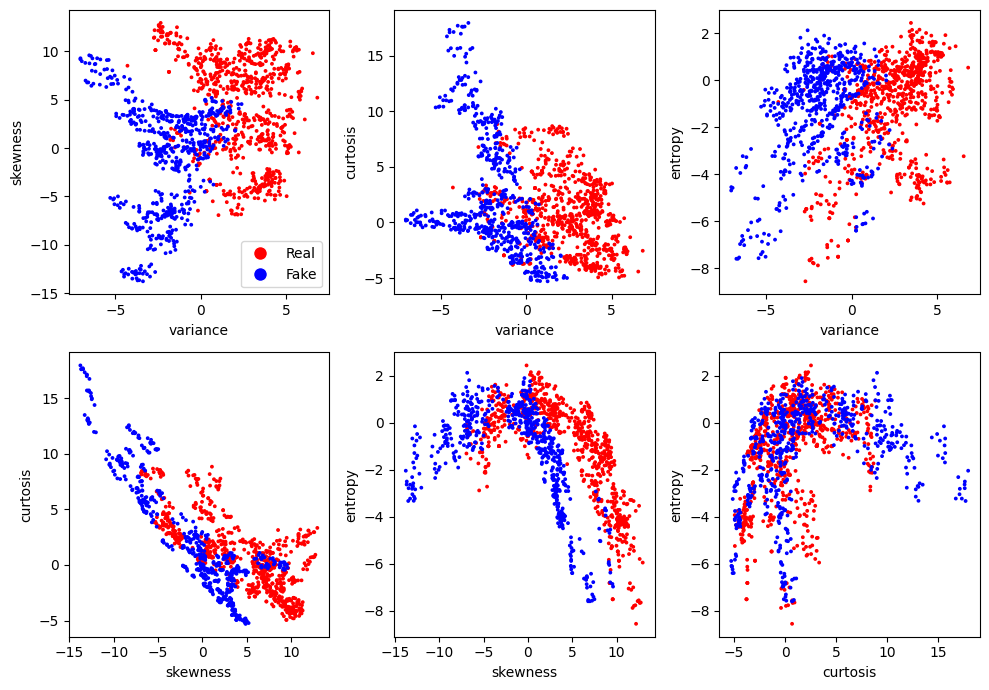

In [ ]:
color_map = {"Real": 'red', "Fake": 'blue'}
counter = 1
plt.figure(figsize=(10, 7))

for i in range(4):
    for j in range(i+1, 4):
        plt.subplot(2, 3, counter)
        counter += 1
        plt.scatter(df.iloc[:, i], df.iloc[:, j], c=[color_map[label] for label in df['class']], s=3)

        # Only creating the legend once or checking if counter == 1 for creating legend would be more efficient
        if counter == 2:  # Create legend only in the first subplot for clarity
            plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Real', markerfacecolor='red', markersize=10),
                                plt.Line2D([0], [0], marker='o', color='w', label='Fake', markerfacecolor='blue', markersize=10)])

        plt.xlabel(f'{df.columns[i]}')
        plt.ylabel(f'{df.columns[j]}')
        plt.subplots_adjust(wspace=0.6,hspace=0.6)
        plt.tight_layout()

# Call plt.show() after all subplots have been created
plt.show()

In [ ]:

#File path for real data
file_path1 = 'https://raw.githubusercontent.com/suisanki/SML_team9/main/ownData/real_r.csv'
#File path for fake data
file_path2 = 'https://raw.githubusercontent.com/suisanki/SML_team9/main/ownData/fake_r_c.csv'

data_real = pd.read_csv(file_path1)
data_fake = pd.read_csv(file_path2)

Following is the analysis between Raw-Colored

In [ ]:
real_rVSfake_r_c = pd.concat([data_real,data_fake], axis=0)
real_rVSfake_r_c.head()

,ID,Variance,Skewness,Curtosis,Entropy,Flag
0,622,20647.959884,-0.787982,-0.702329,14.819580,0
1,623,13653.572511,-0.817349,-0.304924,14.856611,0
2,624,15917.798798,-0.680971,-0.749636,14.843596,0
3,625,17330.388830,-0.808184,-0.424481,14.833187,0
4,626,13408.225843,-0.385424,-0.745270,14.847031,0


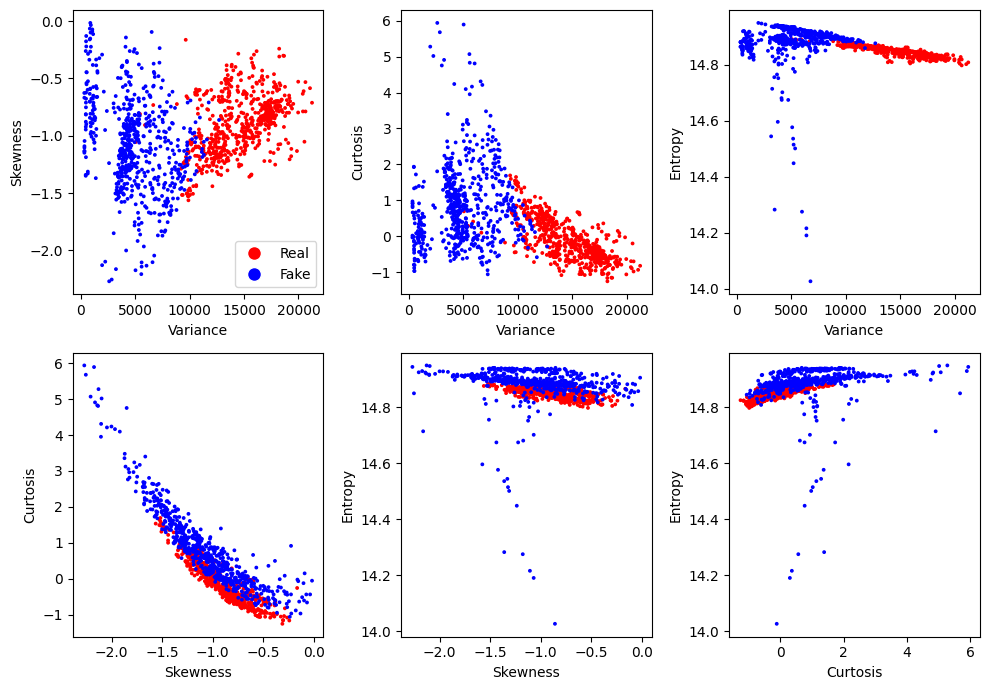

In [ ]:
color_map = {0: 'red', 1: 'blue'}
counter = 1
plt.figure(figsize=(10, 7))

for i in range(1,5):
    for j in range(i+1, 5):
        plt.subplot(2, 3, counter)
        counter += 1
        plt.scatter(real_rVSfake_r_c.iloc[:, i], real_rVSfake_r_c.iloc[:, j], c=[color_map[label] for label in real_rVSfake_r_c['Flag']], s=3)

        # Only creating the legend once or checking if counter == 1 for creating legend would be more efficient
        if counter == 2:  # Create legend only in the first subplot for clarity
            plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Real', markerfacecolor='red', markersize=10),
                                plt.Line2D([0], [0], marker='o', color='w', label='Fake', markerfacecolor='blue', markersize=10)])

        plt.xlabel(f'{real_rVSfake_r_c.columns[i]}')
        plt.ylabel(f'{real_rVSfake_r_c.columns[j]}')
        plt.subplots_adjust(wspace=0.6,hspace=0.6)
        plt.tight_layout()

# Call plt.show() after all subplots have been created
plt.show()

I think I mislabeled 0 and 1 so I have to fix.

It seems that data is linearly separable. Real is characterized by high variance

Following is the analysis between Cropped-color

In [ ]:
#File path for real data
file_path3 = 'https://raw.githubusercontent.com/suisanki/SML_team9/main/ownData/real_c.csv'
#File path for fake data
file_path4 = 'https://raw.githubusercontent.com/suisanki/SML_team9/main/ownData/fake_c_c.csv'

In [ ]:
data_real_c = pd.read_csv(file_path3)
data_fake_c = pd.read_csv(file_path4)

In [ ]:
real_cVSfake_c_c = pd.concat([data_real_c,data_fake_c], axis=0)

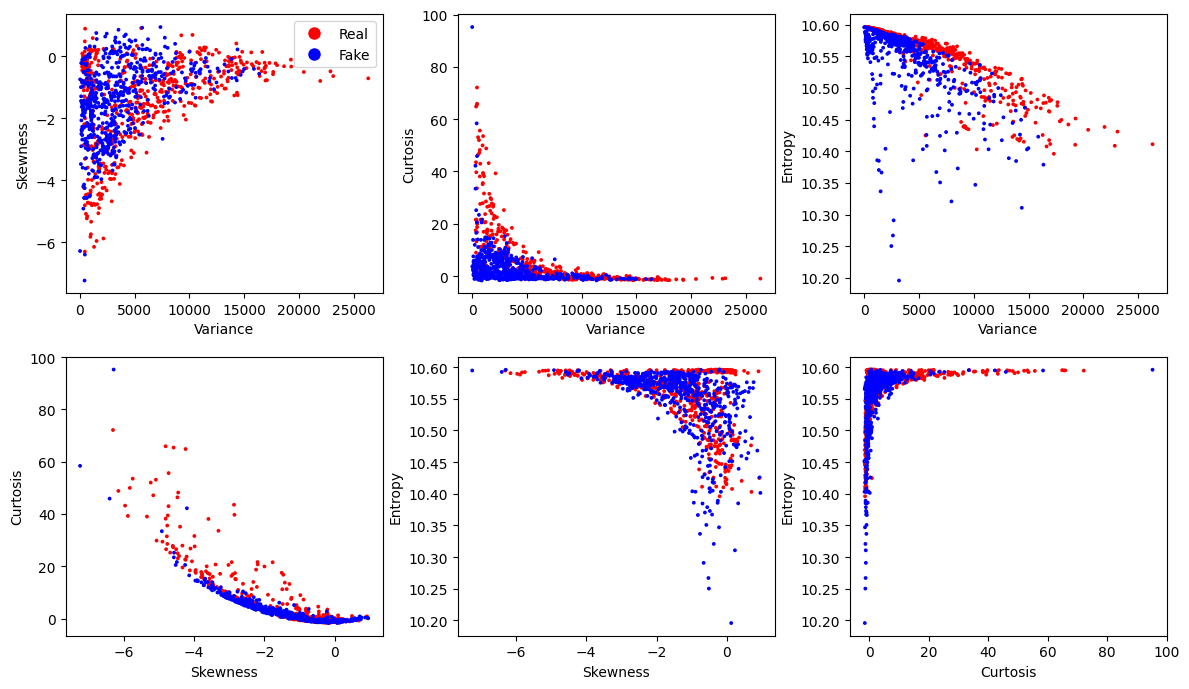

In [ ]:
color_map = {0: 'red', 1: 'blue'}
counter = 1
plt.figure(figsize=(12, 7))

for i in range(1,5):
    for j in range(i+1, 5):
        plt.subplot(2, 3, counter)
        counter += 1
        plt.scatter(real_cVSfake_c_c.iloc[:, i], real_cVSfake_c_c.iloc[:, j], c=[color_map[label] for label in real_cVSfake_c_c['Flag']], s=3)

        # Only creating the legend once or checking if counter == 1 for creating legend would be more efficient
        if counter == 2:  # Create legend only in the first subplot for clarity
            plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Real', markerfacecolor='red', markersize=10),
                                plt.Line2D([0], [0], marker='o', color='w', label='Fake', markerfacecolor='blue', markersize=10)])

        plt.xlabel(f'{real_cVSfake_c_c.columns[i]}')
        plt.ylabel(f'{real_cVSfake_c_c.columns[j]}')
        plt.subplots_adjust(wspace=0.6,hspace=0.6)
        plt.tight_layout()

# Call plt.show() after all subplots have been created
plt.show()

Data hard to distinguish